In [15]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
model = Sequential()
#convolutional
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [10]:
batch_size = 1
steps_per_epoch = 120//batch_size
validation_steps = 50//batch_size

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('face_recogination/train', target_size=(150, 150),
                                                    batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('face_recogination/validation', target_size=(150, 150),
                                                        batch_size=batch_size, class_mode='binary')

Found 120 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [14]:
train_generator[0]

(array([[[[ 0.64873868,  0.58207202,  0.50388968],
          [ 0.64875668,  0.58208996,  0.50390565],
          [ 0.64877468,  0.58210802,  0.50392175],
          ..., 
          [ 0.01590993,  0.01590993,  0.01590993],
          [ 0.01591993,  0.01591993,  0.01591993],
          [ 0.01592992,  0.01592992,  0.01592992]],
 
         [[ 0.5847072 ,  0.51804054,  0.44697288],
          [ 0.5847252 ,  0.51805854,  0.44698888],
          [ 0.5847432 ,  0.51807654,  0.44700485],
          ..., 
          [ 0.02982602,  0.02629109,  0.01922121],
          [ 0.02982203,  0.02628809,  0.01922021],
          [ 0.02981803,  0.02628509,  0.01921921]],
 
         [[ 0.63679099,  0.57012433,  0.49290094],
          [ 0.636774  ,  0.57010734,  0.49288598],
          [ 0.63675702,  0.57009035,  0.49287099],
          ..., 
          [ 0.10746866,  0.07501105,  0.07033858],
          [ 0.10744468,  0.07499606,  0.0703226 ],
          [ 0.1074207 ,  0.07498107,  0.07030661]],
 
         ..., 
         [

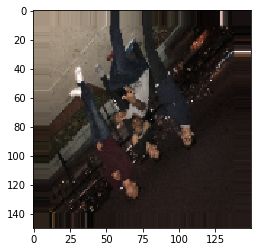

In [16]:
plt.imshow(train_generator[0][0][0])

In [17]:
train_generator[1]

(array([[[[ 0.79700303,  0.7976194 ,  0.78946805],
          [ 0.80704141,  0.81435007,  0.80285263],
          [ 0.80476433,  0.80644965,  0.79776388],
          ..., 
          [ 0.76862752,  0.77261466,  0.766765  ],
          [ 0.77146375,  0.77930689,  0.77538532],
          [ 0.7730999 ,  0.78094304,  0.77533603]],
 
         [[ 0.79700303,  0.7976194 ,  0.78946805],
          [ 0.80704141,  0.81435007,  0.80285263],
          [ 0.80476433,  0.80644965,  0.79776388],
          ..., 
          [ 0.76862752,  0.77261466,  0.766765  ],
          [ 0.77146375,  0.77930689,  0.77538532],
          [ 0.7730999 ,  0.78094304,  0.77533603]],
 
         [[ 0.79700303,  0.7976194 ,  0.78946805],
          [ 0.80704141,  0.81435007,  0.80285263],
          [ 0.80476433,  0.80644965,  0.79776388],
          ..., 
          [ 0.76862752,  0.77261466,  0.766765  ],
          [ 0.77146375,  0.77930689,  0.77538532],
          [ 0.7730999 ,  0.78094304,  0.77533603]],
 
         ..., 
         [

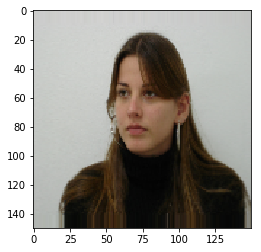

In [18]:
plt.imshow(train_generator[1][0][0])

In [6]:
callback = keras.callbacks.TensorBoard(log_dir='./face_recognition_logs', histogram_freq=0, batch_size=1, write_graph=True, 
                                       write_grads=False, write_images=False, embeddings_freq=0, 
                                       embeddings_layer_names=None, embeddings_metadata=None)

In [13]:
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=10,
                    validation_data=validation_generator, validation_steps=validation_steps, callbacks=[callback])

Epoch 1/10
120/120 [==============================] - 23s 191ms/step - loss: 0.7822 - acc: 0.5917 - val_loss: 0.5674 - val_acc: 1.0000
Epoch 2/10
120/120 [==============================] - 22s 184ms/step - loss: 0.3466 - acc: 0.8750 - val_loss: 0.3111 - val_acc: 0.9000
Epoch 3/10
120/120 [==============================] - 24s 201ms/step - loss: 0.2650 - acc: 0.9083 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 4/10
120/120 [==============================] - 22s 186ms/step - loss: 0.0281 - acc: 1.0000 - val_loss: 7.8746e-04 - val_acc: 1.0000
Epoch 5/10
120/120 [==============================] - 22s 181ms/step - loss: 0.1056 - acc: 0.9583 - val_loss: 0.0346 - val_acc: 1.0000
Epoch 6/10
120/120 [==============================] - 22s 182ms/step - loss: 0.2224 - acc: 0.9333 - val_loss: 0.1955 - val_acc: 0.9600
Epoch 7/10
120/120 [==============================] - 22s 186ms/step - loss: 0.2083 - acc: 0.9500 - val_loss: 0.5141 - val_acc: 0.8800
Epoch 8/10
120/120 [==============================]